In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Github
%cd 'soil-physics-theory'
%cd 'content/chapter-6'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-34797d82a653>", line 3, in <cell line: 3>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/Github')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dis

**Plot ‘typical’ hydraulic conductivity for sand, silt loam and clay soil as a function of water potential using data from Table 6.1 and eqn (6.34). Use a log–log scale and plot both saturated and unsaturated conductivity. Use the graphs to determine the water potential at which water would flow from silt loam into sand in a layered profile with infiltration.**

In [4]:
import numpy as np

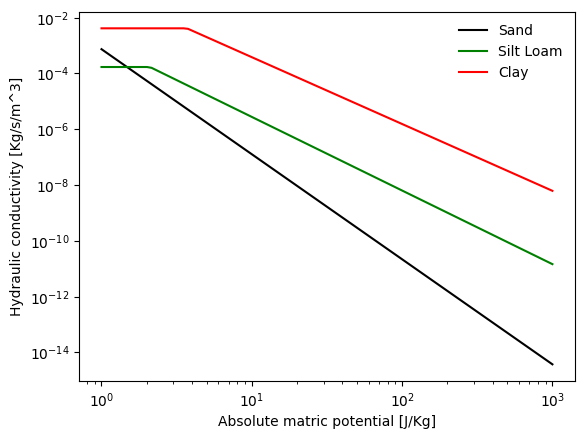

In [5]:
#For sand soil
psi_s=-0.7 #[J kg–1]
dgs=211.11 #[μm]
bs=1.7
#For silt loam soil
psi_sl=-2.1 #[J kg–1]
dgsl=10.53 #[μm]
bsl=4.7
#For clay soil
psi_c=-3.7 #[J kg–1]
dgc=1.55 #[μm]
bc=7.6
theta_s=0.5 #assume for all texture

Ks_sand = 0.07*(theta_s*(1-(-psi_s/33)**(1/bs)))**4 #Eq. 6.34, cm/s
psi = np.logspace(0, 3, 100)
Ksand = np.piecewise(-psi, [-psi< psi_s, -psi >= psi_s], [lambda x: Ks_sand*(psi_s/x)**(2+3/bs), Ks_sand])

Ks_siltloam = 0.07*(theta_s*(1-(-psi_sl/33)**(1/bsl)))**4
psi = np.logspace(0, 3, 100)
Ksiltloam = np.piecewise(-psi, [-psi< psi_sl, -psi >= psi_sl], [lambda x: Ks_siltloam*(psi_sl/x)**(2+3/bsl), Ks_siltloam])

Ks_clay = 0.07 * (theta_s*(1 - (-psi_c/33)**1/bc))**4
psi = np.logspace(0, 3, 100)
Kclay = np.piecewise(-psi, [-psi< psi_c, -psi >= psi_c], [lambda x: Ks_clay*(psi_c/x)**(2+3/bc), Ks_clay])

#print(Ks_sand)
#print(Ks_siltloam)
#print(Ks_clay)
import matplotlib.pyplot as plt
plt.loglog(psi,Ksand, "k")
plt.loglog(psi,Ksiltloam, "g")
plt.loglog(psi,Kclay, "r")
plt.xlabel("Absolute matric potential [J/Kg]")
plt.ylabel("Hydraulic conductivity [Kg/s/m^3]")
plt.legend(['Sand', 'Silt Loam', 'Clay'], frameon=False)
plt.legend
plt.show()

**6.2. Write a Python function to compute saturated hydraulic conductivity from bulk density, silt fraction and clay fraction. Use your program to show how tillage affects hydraulic conductivity (assuming that tillage decreases the bulk density).**


In [ ]:
from PSP_hydraulicConductivity import*
import matplotlib.pyplot as plt

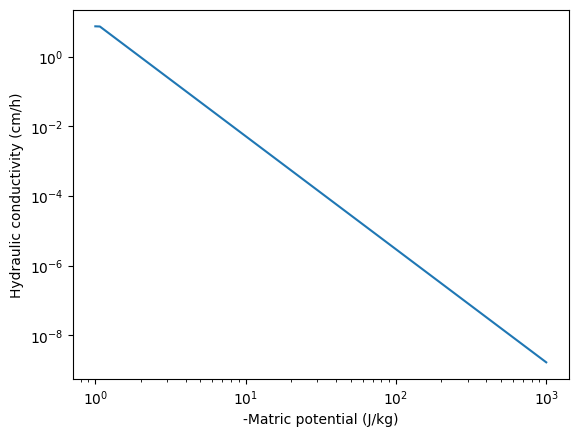

In [ ]:
silt = 0.1 # mass fraction of silt (g/g)
clay = 0.1 # mass fraction of clay (g/g)
bulkDensity = 1200. # bulk density (kg/m^3)
K, psi = hydraulicConductivity(silt,clay,bulkDensity)

plt.loglog(psi,K*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.show()